In [10]:
import pandas as pd
import numpy as np
import os 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score

datasets_root=r'.'
train = pd.read_csv(os.path.join(datasets_root, 'fashion-mnist_train.csv'))
test = pd.read_csv(os.path.join(datasets_root, 'fashion-mnist_test.csv'))

In [11]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
'''
From Kaggle challange we copy the labalw discription
'''
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [13]:
df_train = train.copy()
df_test = test.copy()

X_train= df_train.drop(['label'],axis = 1)
X_train.shape

(60000, 784)

In [14]:
Y_train = df_train['label']

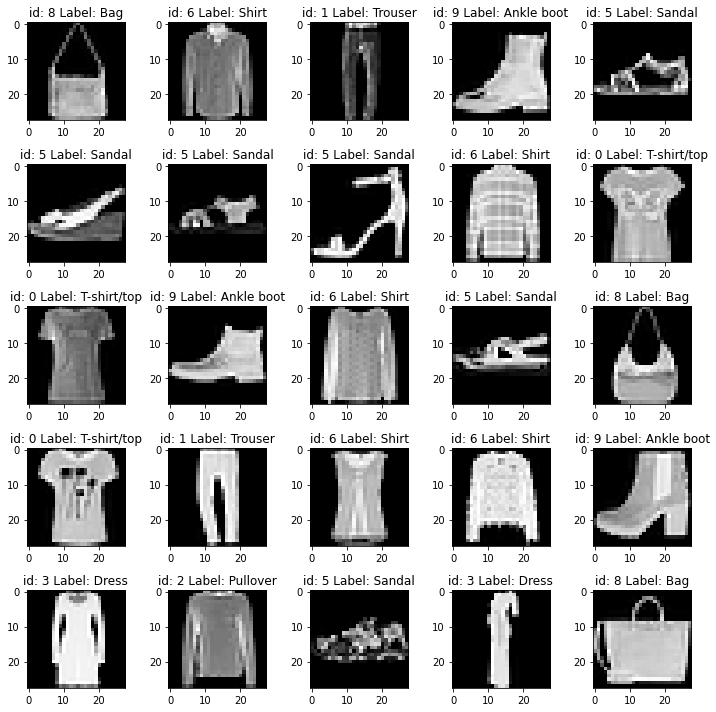

In [15]:
import matplotlib.pyplot as plt

num_row = 5
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(25):
    ind = np.random.randint(X_train.shape[0])
    grid_data = X_train.iloc[ind].values.reshape(28,28)
    ax = axes[i//num_col, i%num_col]
    ax.imshow(grid_data,  cmap='gray')
    ax.set_title('id: {} Label: {}'.format(Y_train.iloc[ind], labels[Y_train.iloc[ind]]))
plt.tight_layout()
plt.show()

## KNN

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import scikitplot.metrics as skplt
def KNN(X_train,y_train,X_test,y_test, algo, n,w):
    clf = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm= algo, n_jobs=-1)
    clf.fit(X_train,y_train)
    probs= clf.predict_proba(X_test)
    print("AUC score on test data", roc_auc_score(y_test,probs,multi_class='ovr'))
    prediction = clf.predict(X_test)
    skplt.plot_confusion_matrix(y_test,prediction)
    print("macro f1 score for data :",metrics.f1_score(y_test, prediction, average = 'macro'))
    print("micro f1 scoore for data:",metrics.f1_score(y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(y_test,prediction))
    print("Precision recall report for data:\n",metrics.classification_report(y_test, prediction))

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_neighbors': [10, 100, 200], 'weights': ['distance', 'uniform'], 'algorithm': ['ball_tree','kd_tree','brute']},
 ]
clf = KNeighborsClassifier(n_jobs=-1)
grid_search = GridSearchCV(clf, param_grid, cv=2, verbose=2 )
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END algorithm=ball_tree, n_neighbors=10, weights=distance; total time= 3.2min
[CV] END algorithm=ball_tree, n_neighbors=10, weights=distance; total time= 3.2min
[CV] END algorithm=ball_tree, n_neighbors=10, weights=uniform; total time= 3.3min
[CV] END algorithm=ball_tree, n_neighbors=10, weights=uniform; total time= 3.2min
[CV] END algorithm=ball_tree, n_neighbors=100, weights=distance; total time= 2.7min
[CV] END algorithm=ball_tree, n_neighbors=100, weights=distance; total time= 2.3min
[CV] END algorithm=ball_tree, n_neighbors=100, weights=uniform; total time= 2.5min
[CV] END algorithm=ball_tree, n_neighbors=100, weights=uniform; total time= 2.6min
[CV] END algorithm=ball_tree, n_neighbors=200, weights=distance; total time= 2.8min
[CV] END algorithm=ball_tree, n_neighbors=200, weights=distance; total time= 2.5min
[CV] END algorithm=ball_tree, n_neighbors=200, weights=uniform; total time= 2.5min
[CV] END algorithm=ball_

{'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}

In [19]:
grid_search.best_score_

0.8420222222222222

AUC score on test data 0.9784200433478508
macro f1 score for data : 0.8548977871622105
micro f1 scoore for data: 0.8552666666666666
hamming loss for data: 0.14473333333333332
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      1487
           1       1.00      0.96      0.98      1513
           2       0.75      0.81      0.78      1514
           3       0.91      0.88      0.89      1524
           4       0.78      0.78      0.78      1476
           5       1.00      0.80      0.89      1493
           6       0.66      0.60      0.63      1509
           7       0.87      0.95      0.91      1485
           8       0.97      0.94      0.96      1522
           9       0.88      0.97      0.92      1477

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.85     15000
weighted avg       0.86      0.86      0.85     15000



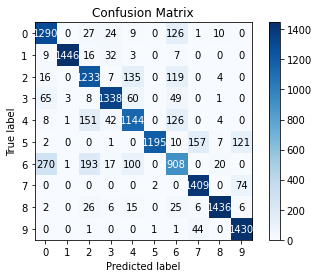

In [20]:
KNN(x_train,y_train,x_test,y_test, 'ball_tree', 10, 'distance')

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def RndForest(X_train,y_train,X_test,y_test, n, f, b):
    clf = RandomForestClassifier(n_estimators=n, max_features=f, bootstrap=b, n_jobs=-1)
    clf.fit(X_train,y_train)
    probs= clf.predict_proba(X_test)
    print("AUC score on test data", roc_auc_score(y_test,probs,multi_class='ovr'))
    prediction = clf.predict(X_test)
    skplt.plot_confusion_matrix(y_test,prediction)
    print("macro f1 score for data :",metrics.f1_score(y_test, prediction, average = 'macro'))
    print("micro f1 scoore for data:",metrics.f1_score(y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(y_test,prediction))
    print("Precision recall report for data:\n",metrics.classification_report(y_test, prediction))

In [22]:
param_grid = [
 {'n_estimators': [10, 50, 100], 'max_features': ['auto', 'sqrt', 'log2']},
 {'bootstrap': [False], 'n_estimators': [10, 50, 100], 'max_features': ['auto', 'sqrt', 'log2']},
 ]
forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=2, verbose=2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END .................max_features=auto, n_estimators=10; total time=   2.5s
[CV] END .................max_features=auto, n_estimators=10; total time=   2.4s
[CV] END .................max_features=auto, n_estimators=50; total time=  11.6s
[CV] END .................max_features=auto, n_estimators=50; total time=  11.6s
[CV] END ................max_features=auto, n_estimators=100; total time=  26.0s
[CV] END ................max_features=auto, n_estimators=100; total time=  26.5s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   2.4s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   2.6s
[CV] END .................max_features=sqrt, n_estimators=50; total time=  12.5s
[CV] END .................max_features=sqrt, n_estimators=50; total time=  11.6s
[CV] END ................max_features=sqrt, n_estimators=100; total time=  23.1s
[CV] END ................max_features=sqrt, n_es

{'bootstrap': False, 'max_features': 'auto', 'n_estimators': 100}

In [31]:
grid_search.best_score_

0.8785777777777777

AUC score on test data 0.9910908278280874
macro f1 score for data : 0.8860342348140773
micro f1 scoore for data: 0.8874666666666665
hamming loss for data: 0.11253333333333333
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1487
           1       1.00      0.97      0.98      1513
           2       0.79      0.83      0.81      1514
           3       0.89      0.92      0.91      1524
           4       0.79      0.84      0.81      1476
           5       0.97      0.96      0.97      1493
           6       0.76      0.61      0.67      1509
           7       0.94      0.95      0.94      1485
           8       0.96      0.97      0.96      1522
           9       0.95      0.96      0.95      1477

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



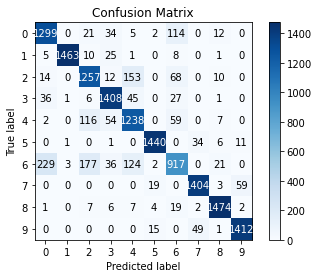

In [33]:
RndForest(x_train,y_train,x_test,y_test,100, 'sqrt', False)

## PCA

Till now we get accuracy of 0.89 with RandomForest and 0.86 with KNN on all features. lets see if when we reduce some features, with PCA, it change our predictions accuracy. 

187


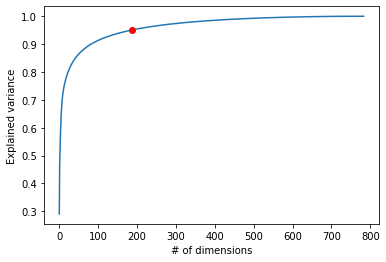

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)
plt.xlabel('# of dimensions')
plt.ylabel('Explained variance')
plt.plot(cumsum);
plt.plot(d, 0.95, color='red', marker='o');

Is shown in the graph, by choosing around 187 features, we can retain more than 95% of the variance. I ended up choosing 187 as the number of features for PCA

In [35]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [36]:
X_train_pca.shape

(45000, 187)

In [37]:
X_test_pca.shape

(15000, 187)

AUC score on test data 0.9880933855743746
macro f1 score for data : 0.869908076490176
micro f1 scoore for data: 0.8717333333333334
hamming loss for data: 0.12826666666666667
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1487
           1       1.00      0.95      0.97      1513
           2       0.78      0.83      0.80      1514
           3       0.88      0.90      0.89      1524
           4       0.78      0.81      0.79      1476
           5       0.94      0.94      0.94      1493
           6       0.75      0.58      0.65      1509
           7       0.94      0.93      0.93      1485
           8       0.94      0.96      0.95      1522
           9       0.93      0.96      0.95      1477

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



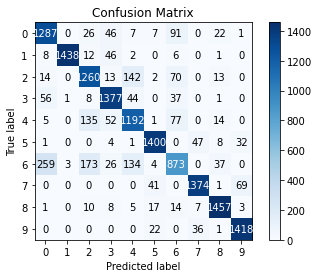

In [38]:
RndForest(X_train_pca,y_train,X_test_pca,y_test,100, 'sqrt', False)

AUC score on test data 0.9812442006587684
macro f1 score for data : 0.862728888079657
micro f1 scoore for data: 0.8630666666666666
hamming loss for data: 0.13693333333333332
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1487
           1       1.00      0.96      0.98      1513
           2       0.76      0.80      0.78      1514
           3       0.91      0.89      0.90      1524
           4       0.77      0.78      0.78      1476
           5       0.99      0.86      0.92      1493
           6       0.67      0.61      0.64      1509
           7       0.90      0.95      0.93      1485
           8       0.97      0.96      0.96      1522
           9       0.90      0.97      0.93      1477

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



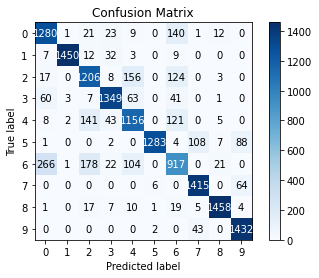

In [39]:

KNN(X_train_pca,y_train,X_test_pca,y_test, 'ball_tree', 10 ,'distance')

# Conclusions:

In this work we tested two different classifiers, KNN and RandomForest, on fashion MNIST data-set. First we train the raw data on both classifiers and recieved accuracy of 0.89 with RandomForest and 0.86 with KNN. Also, we find the best params for our models by GridSearchCV. 
Then we try to reduce amount of features in our data, to 187 features with PCA, instead of 784 features, and we see that it didnt effact our accuracy much. 0.87 with RandomForest and 0.86 with KNN. 
Conclusions:
 1. the PCA method is make our data more comportable, with less dimantions, without harm our predictions much.
 2. most of the wrong predictions were made between the labals : ''Shirt' -> ('T-shirt/top', 'Pullover' and 'Coat') its logical as they look realy close to each other. 

